优化算法:使用Keras提供的其他优化器，如梯度下降，看在其他算法下模型参数对模型训练和过拟合的速度有怎样的影响。
损失函数:尝试使用Keras其他可用的损失函数，探究选用其他的损失函数是否可以提升模型的性能。
学习率与迭代次数更新策略
更大的Batch Size:使用更大的Batch Size意味着模型在训练集和测试集上的数据操作规模更大了

In [1]:
#from __future__ import absolute_import
#from __future__ import division
#from __future__ import print_function
import os
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

from keras.applications.inception_v3 import preprocess_input
from keras.applications import imagenet_utils
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

from keras.layers import *
#from keras.layers import Input
from keras.models import *
#from keras.models import Model
#from keras.layers import Input, Dense
#a = Input(shape=(32,))
#b = Dense(32)(a)
#model = Model(inputs=a, outputs=b)
from keras.callbacks import *
from keras.optimizers import *
from keras.regularizers import *
from keras import initializers
from keras.applications import *

#from keras.utils import multi_gpu_model 
#from keras.applications import ResNet50
#from keras.applications import VGG16
#from keras.applications import VGG19
#from keras.applications import Xception # TensorFlow ONLY
#from keras.applications import InceptionResNetV2
#from keras.applications import InceptionV3

#tf.keras.applications.inception_v3.InceptionV3
#tf.keras.applications.inception_resnet_v2.InceptionResNetV2
####################################################################
#设置GPU
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
#os.environ["CUDA_VISIBLE_DEVICES"]="0,1" 
os.environ["CUDA_VISIBLE_DEVICES"] = "2"

#设置项
#看具体的模型参数设置在:https://www.tensorflow.org/api_docs/python/tf/keras/applications
MODELS = {"InceptionResNetV2":InceptionResNetV2,"Xception":Xception}
#MODELS = {"NASNetLarge":NASNetLarge,"VGG16":VGG16}
#"InceptionV3":InceptionV3,"DenseNet121":DenseNet121,
 #       "DenseNet169":DenseNet169,"DenseNet201":DenseNet201,"Xception":Xception, 
 #       "InceptionResNetV2":InceptionResNetV2,
#"ResNet50":ResNet50, 
#"VGG16":VGG16,"VGG16":VGG19,"NASNetMobile":NASNetMobile

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
classes = ['collar_design_labels', 'neckline_design_labels', 'skirt_length_labels', 
           'sleeve_length_labels', 'neck_design_labels', 'lapel_design_labels', 
           'pant_length_labels','coat_length_labels']   
#classes = ['collar_design_labels', 'neckline_design_labels', 'neck_design_labels']   
#classes = ['pant_length_labels','coat_length_labels']    
fai_result = []

Using TensorFlow backend.


######################在InceptionResNetV2下训练8个分类器####################
#######InceptionResNetV2:collar_design_labels####################
选择的属性为:collar_design_labels, 种类的为:5,样本数: 8393
数据装载到内存完毕:InceptionResNetV2,collar_design_labels
Epoch 1/42
8393/8393 [==============================] - 246s 29ms/step - loss: 1.5787 - acc: 0.2942
Epoch 2/42
8393/8393 [==============================] - 221s 26ms/step - loss: 1.4834 - acc: 0.3466
Epoch 3/42
8393/8393 [==============================] - 222s 26ms/step - loss: 1.3802 - acc: 0.4093
Epoch 4/42
8393/8393 [==============================] - 229s 27ms/step - loss: 1.2143 - acc: 0.4979
Epoch 5/42
8393/8393 [==============================] - 228s 27ms/step - loss: 0.9995 - acc: 0.6194
Epoch 6/42
8393/8393 [==============================] - 235s 28ms/step - loss: 0.8242 - acc: 0.7015
Epoch 7/42
8393/8393 [==============================] - 228s 27ms/step - loss: 0.6909 - acc: 0.7494
Epoch 8/42
8393/8393 [==============================] - 230s 27ms/step

13299/13299 [==============================] - 398s 30ms/step - loss: 0.0888 - acc: 0.9735
Epoch 28/42
13299/13299 [==============================] - 396s 30ms/step - loss: 0.1318 - acc: 0.9601
Epoch 29/42
13299/13299 [==============================] - 400s 30ms/step - loss: 0.1169 - acc: 0.9621
Epoch 30/42
13299/13299 [==============================] - 397s 30ms/step - loss: 0.1434 - acc: 0.9553
Epoch 31/42
13299/13299 [==============================] - 397s 30ms/step - loss: 0.2039 - acc: 0.9371
Epoch 32/42
13299/13299 [==============================] - 399s 30ms/step - loss: 0.0766 - acc: 0.9777
Epoch 33/42
13299/13299 [==============================] - 398s 30ms/step - loss: 0.0750 - acc: 0.9793
Epoch 34/42
13299/13299 [==============================] - 399s 30ms/step - loss: 0.1109 - acc: 0.9662
Epoch 35/42
13299/13299 [==============================] - 399s 30ms/step - loss: 0.0641 - acc: 0.9801
Epoch 36/42
13299/13299 [==============================] - 396s 30ms/step - loss: 0.0

11320/11320 [==============================] - 362s 32ms/step - loss: 0.2539 - acc: 0.9147
Epoch 14/42
11320/11320 [==============================] - 361s 32ms/step - loss: 0.1930 - acc: 0.9372
Epoch 15/42
11320/11320 [==============================] - 364s 32ms/step - loss: 0.1726 - acc: 0.9445
Epoch 16/42
11320/11320 [==============================] - 362s 32ms/step - loss: 0.1628 - acc: 0.9471
Epoch 17/42
11320/11320 [==============================] - 353s 31ms/step - loss: 0.1761 - acc: 0.9452
Epoch 18/42
11320/11320 [==============================] - 332s 29ms/step - loss: 0.1477 - acc: 0.9525
Epoch 19/42
11320/11320 [==============================] - 349s 31ms/step - loss: 0.1182 - acc: 0.9618
Epoch 20/42
11320/11320 [==============================] - 367s 32ms/step - loss: 0.1436 - acc: 0.9549
Epoch 21/42
11320/11320 [==============================] - 367s 32ms/step - loss: 0.1377 - acc: 0.9565
Epoch 22/42
11320/11320 [==============================] - 367s 32ms/step - loss: 0.0

ResourceExhaustedError: OOM when allocating tensor with shape[256,64,147,147]
	 [[Node: inception_resnet_v2_8/batch_normalization_1627/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, data_format="NHWC", epsilon=0.001, is_training=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](inception_resnet_v2_8/conv2d_1627/convolution, inception_resnet_v2_8/batch_normalization_1632/Const, batch_normalization_1627/beta/read, inception_resnet_v2_8/batch_normalization_1824/Const_1, inception_resnet_v2_8/batch_normalization_1824/Const_1)]]
	 [[Node: softmax_8/Softmax/_123429 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_8733_softmax_8/Softmax", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]

Caused by op 'inception_resnet_v2_8/batch_normalization_1627/FusedBatchNorm', defined at:
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-3-50552f0c8e80>", line 48, in <module>
    x = cnn_model(x)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/keras/engine/topology.py", line 619, in __call__
    output = self.call(inputs, **kwargs)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/keras/engine/topology.py", line 2085, in call
    output_tensors, _, _ = self.run_internal_graph(inputs, masks)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/keras/engine/topology.py", line 2236, in run_internal_graph
    output_tensors = _to_list(layer.call(computed_tensor, **kwargs))
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/keras/layers/normalization.py", line 181, in call
    epsilon=self.epsilon)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 1827, in normalize_batch_in_training
    epsilon=epsilon)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py", line 1802, in _fused_normalize_batch_in_training
    data_format=tf_data_format)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py", line 831, in fused_batch_norm
    name=name)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/tensorflow/python/ops/gen_nn_ops.py", line 2034, in _fused_batch_norm
    is_training=is_training, name=name)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/home/slb/anaconda2/envs/py36_tf_keras/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor with shape[256,64,147,147]
	 [[Node: inception_resnet_v2_8/batch_normalization_1627/FusedBatchNorm = FusedBatchNorm[T=DT_FLOAT, data_format="NHWC", epsilon=0.001, is_training=true, _device="/job:localhost/replica:0/task:0/device:GPU:0"](inception_resnet_v2_8/conv2d_1627/convolution, inception_resnet_v2_8/batch_normalization_1632/Const, batch_normalization_1627/beta/read, inception_resnet_v2_8/batch_normalization_1824/Const_1, inception_resnet_v2_8/batch_normalization_1824/Const_1)]]
	 [[Node: softmax_8/Softmax/_123429 = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_8733_softmax_8/Softmax", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]


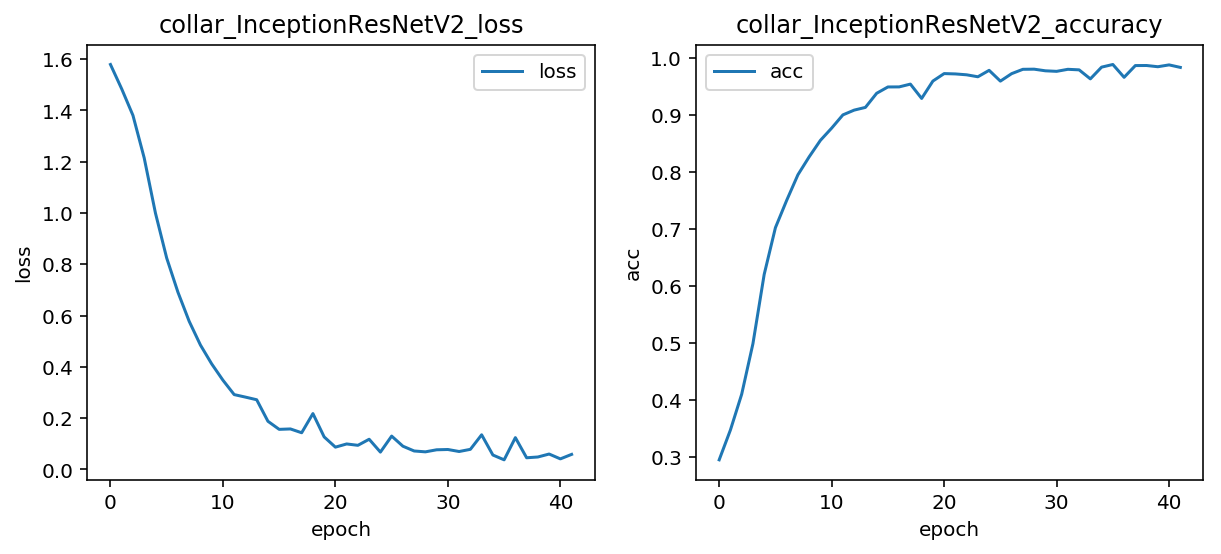

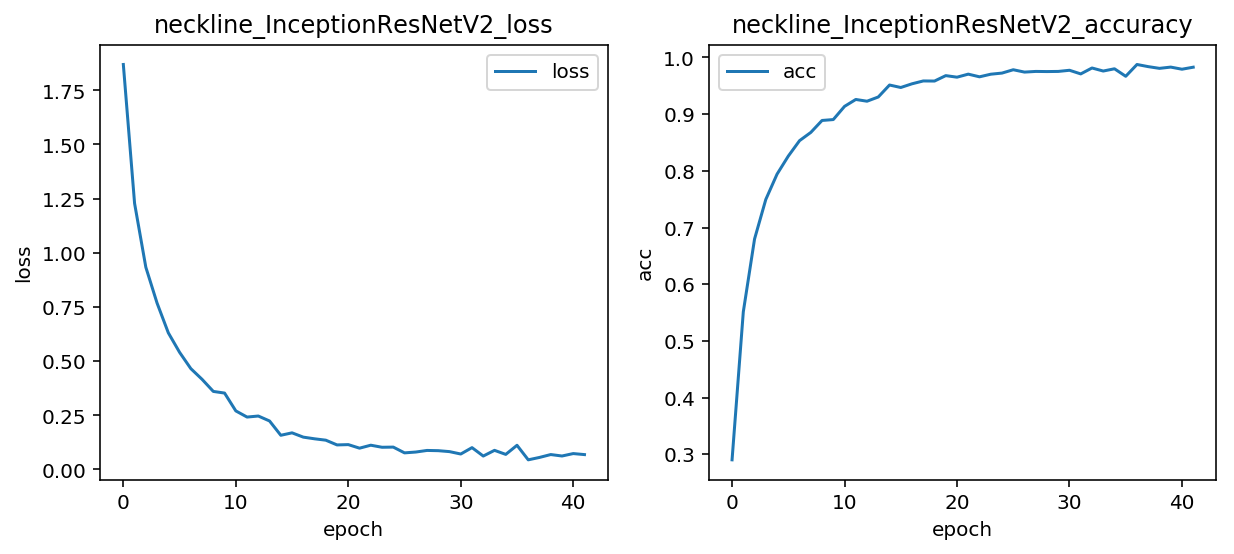

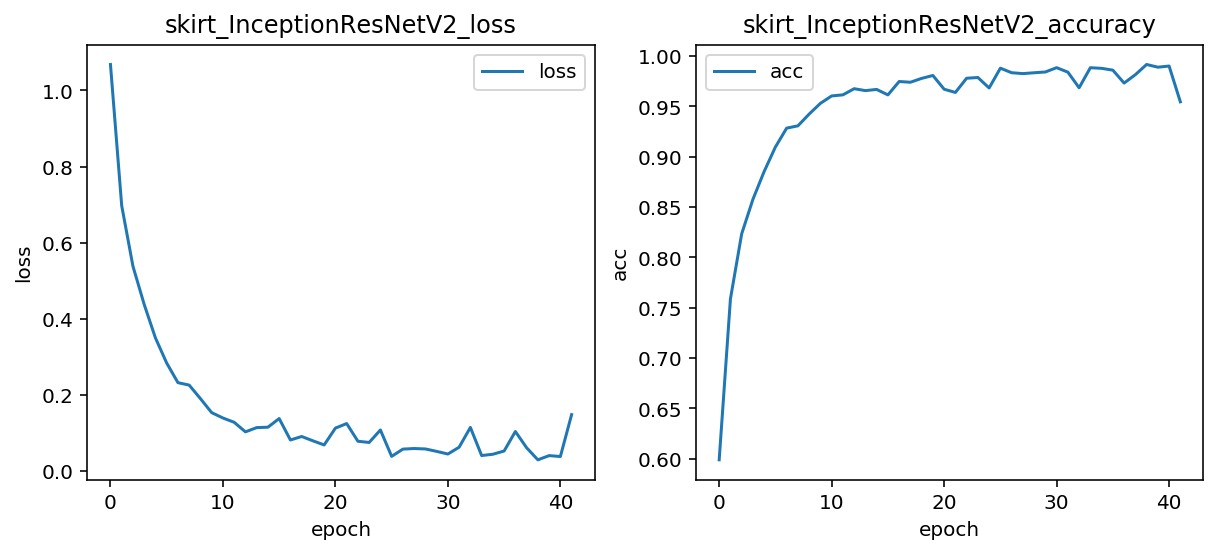

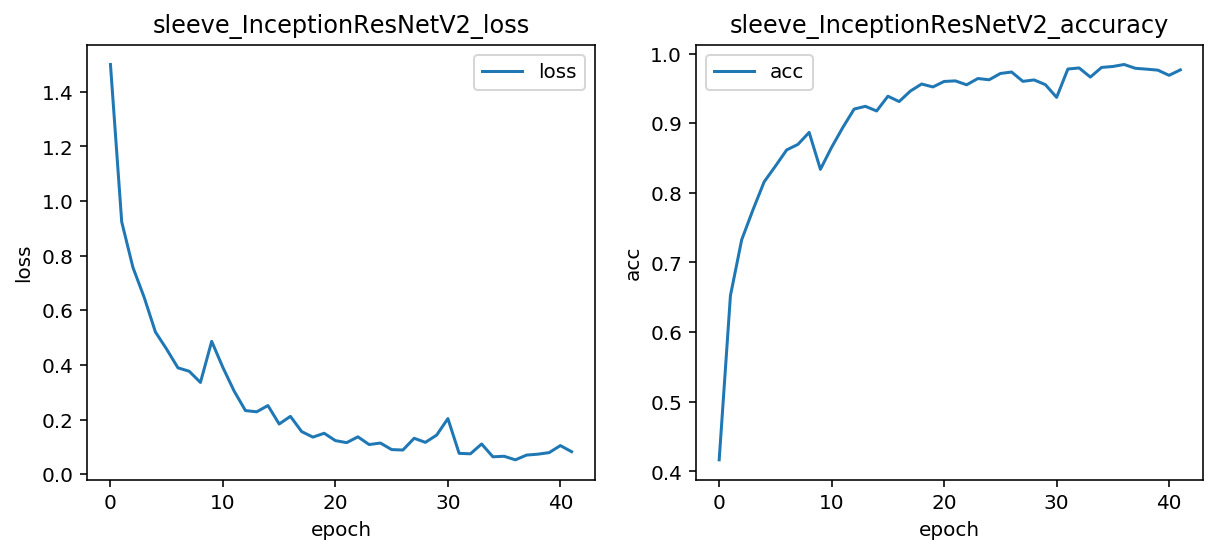

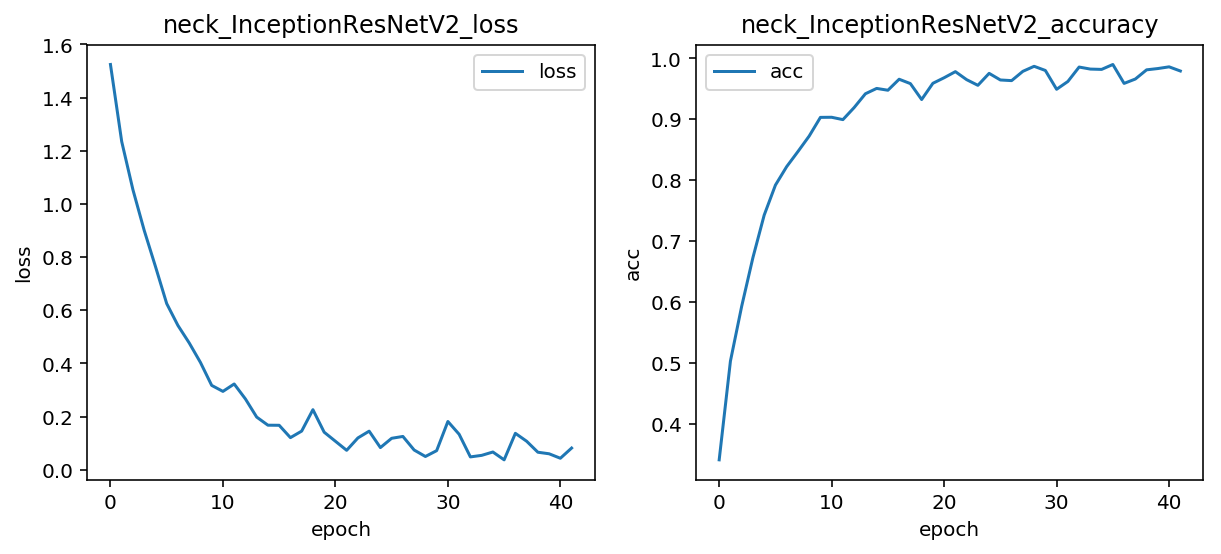

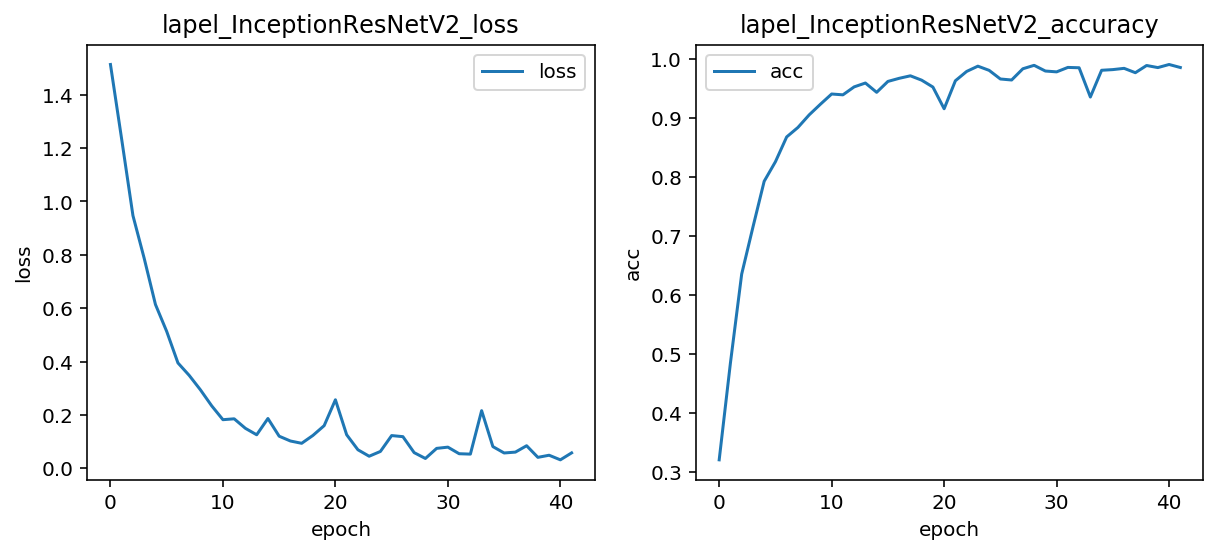

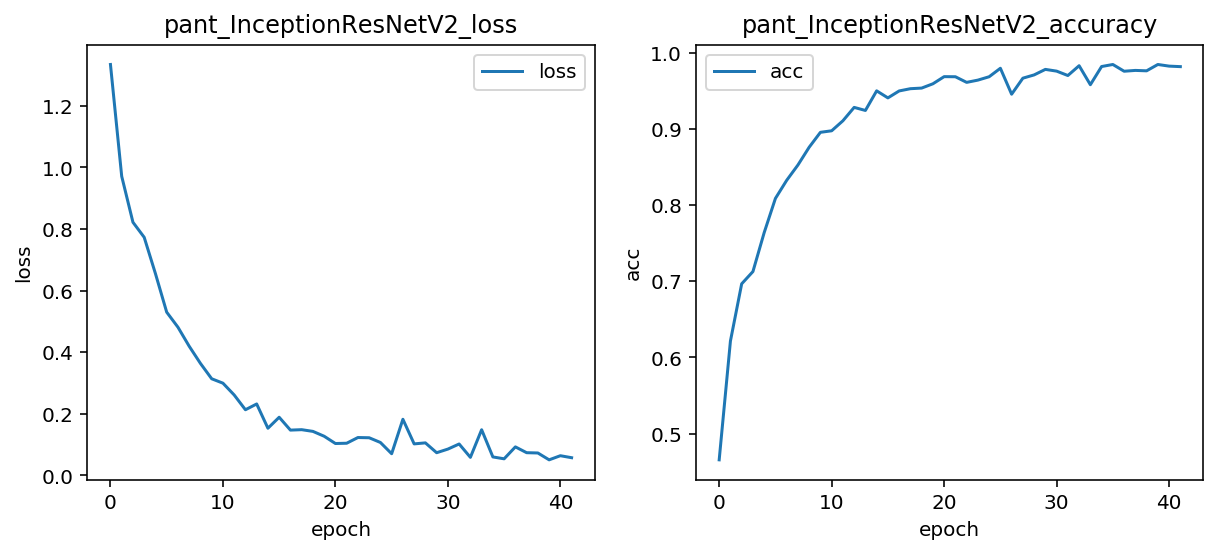

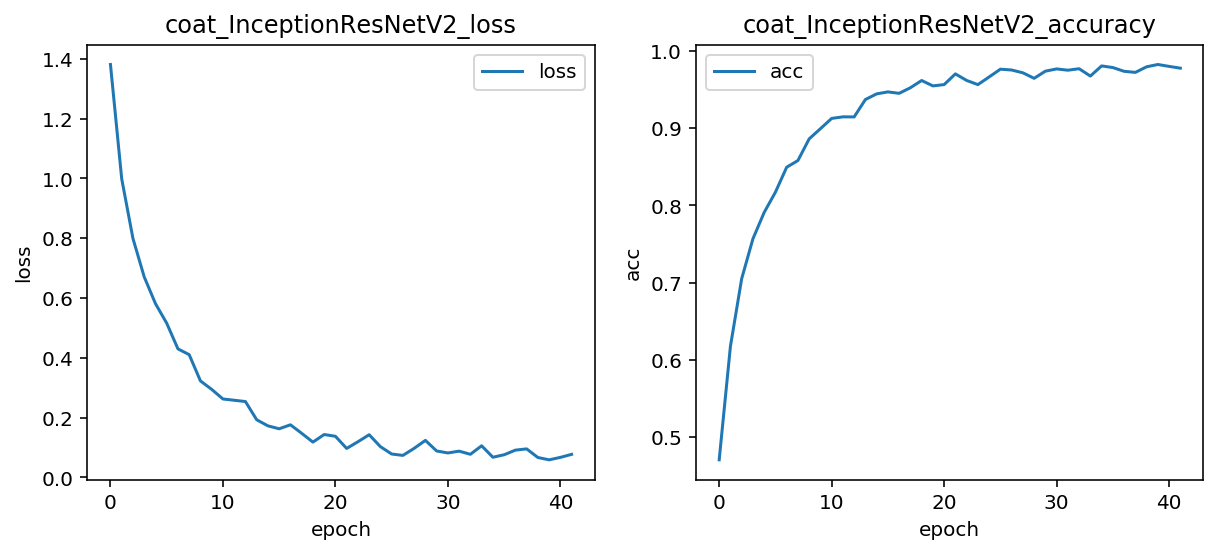

In [3]:
for KEY, MODLE in MODELS.items():
    #
    #为299*299,设置如下
    ppreprocess = preprocess_input
    if KEY in ["InceptionV3","Xception", "InceptionResNetV2"]:
        width = 299
    elif KEY == "NASNetLarge":
        width = 331
    else:
        width = 224
        ppreprocess = imagenet_utils.preprocess_input 
    print('######################在{0}下训练8个分类器####################'.format(KEY))
    for cur_class in classes:
        print('#######{0}:{1}####################'.format(KEY,cur_class ))
        df_train = pd.read_csv('../train/Annotations/{0}.csv'.format(cur_class), header=None)
        df_train.columns = ['image_id', 'class', 'label']
        df_load = df_train.copy()
        df_load.reset_index(inplace=True)
        del df_load['index']
        print("选择的属性为:{0}, 种类的为:{1},样本数: {2}".format(cur_class , len(df_load['label'][0]),len(df_load)))
        
        n = len(df_load)
        n_class = len(df_load['label'][0])
        prefix_cls = cur_class.split('_')[0]
        
        X = np.zeros((n, width, width, 3), dtype=np.uint8)
        y = np.zeros((n, n_class), dtype=np.uint8)
        for i in range(n):
            tmp_label = df_load['label'][i]
            if len(tmp_label) > n_class:
                print(df_load['image_id'][i])
            X[i] = cv2.resize(cv2.imread('../train/{0}'.format(df_load['image_id'][i])), (width, width))
            y[i][tmp_label.find('y')] = 1
        print("数据装载到内存完毕:{0},{1}".format(KEY,cur_class))
        #plt.figure(figsize=(12, 7))
        #for i in range(8):
            #random_index = random.randint(0, n-1)
            #plt.subplot(2, 4, i+1)
            #plt.imshow(X[random_index][:,:,::-1])
            #plt.title(y[random_index])
        #plt.savefig('../images/{0}/{0}_{1}.png'.format(prefix_cls, KEY),bbox_inches='tight')
        
        #设置模型的finetune细节
        cnn_model = MODLE(include_top=False, input_shape=(width, width, 3), weights='imagenet',pooling='avg')
        inputs = Input((width, width, 3))
        x = inputs
        x = Lambda(ppreprocess, name='preprocessing')(x)
        x = cnn_model(x)
        #下面是新加的层
        #x = GlobalAveragePooling2D()(x)
        x = Dropout(0.5)(x)
        #x = Flatten(name='flatten')(x)
        x = Dense(1024, activation='relu', name='fc1')(x)
        # n_class为对应属性的分类个数
        
        x = Dense(512, activation='relu', kernel_initializer=initializers.he_uniform(seed=None),name='fc2')(x)
        x = Dropout(0.5)(x)
        x = Dense(n_class, activation='softmax', name='softmax')(x)
        
        model = Model(inputs, x)
        #X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.05, random_state=50)
        
        #sgd = SGD(lr=learning_rate, decay=learning_rate/nb_epoch, momentum=0.9, nesterov=True)
        #adam = optimizers.Adam(lr=1e-4)
        #optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True))
        adam = Adam(lr=0.001)
        
        #多GPU训练,因为keras设计的自动保存最好模型,但是多GPU训练,其save()就没法用了
        #model = multi_gpu_model(model, 2)  

        model.compile(optimizer=adam,
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

# Callback that implements learning rate schedule
#schedule = Step([20], [1e-4, 1e-6])
#history = model.fit(X_train, Y_train,
#                    batch_size=batch_size, nb_epoch=nb_epoch, validation_data=(X_test,Y_test),
#                    callbacks=[
#                           schedule,
#                           keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0,save_best_only=True, mode='auto')

# 该回调函数将在每个epoch后保存模型到filepath
#keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0,save_best_only=True, mode='auto')
# 当监测值不再改善时，该回调函数将中止训练.
#当early stop被激活（如发现loss相比上一个epoch训练没有下降），则经过patience个epoch后停止训练
#keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')

        #设置训练完之后,最好的模型保存路径
       # checkpointer = ModelCheckpoint(filepath='../models/{0}/{0}_{1}.best.h5'.format(prefix_cls,KEY), verbose=1, 
        #                            save_best_only=True)
        #训练开始,并保存训练过程的loss和acc变化
        h = model.fit(X, y, batch_size=16, epochs=42, 
                     # callbacks=[EarlyStopping(patience=10), checkpointer], 
                      shuffle=True)
        plt.figure(figsize=(10, 4))
        plt.subplot(1, 2, 1)
        plt.plot(h.history['loss'])
        
        plt.legend(['loss'])
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.title('{0}_{1}_loss'.format(prefix_cls, KEY))
        
        plt.subplot(1, 2, 2)
        plt.plot(h.history['acc'])
        
        plt.legend(['acc'])
        plt.ylabel('acc')
        plt.xlabel('epoch')
        plt.title('{0}_{1}_accuracy'.format(prefix_cls, KEY))
        #保存训练损失和准确率变化的图像
        plt.savefig('../models/{0}/{0}_{1}.png'.format(prefix_cls, KEY),bbox_inches='tight')
        
        print("开始保存模型")
        model.save_weights('../models/{0}/{0}_{1}vv2.best.h5'.format(prefix_cls, KEY))
    
        #测试集上预测并输出结果
        df_test = pd.read_csv('../test/Tests/question.csv', header=None)
        df_test.columns = ['image_id', 'class', 'x']
        del df_test['x']
        
        df_load = df_test[(df_test['class'] == cur_class)].copy()
        df_load.reset_index(inplace=True)
        del df_load['index']
        
        n = len(df_load)
        X_test = np.zeros((n, width, width, 3), dtype=np.uint8)

        for i in range(n):
            X_test[i] = cv2.resize(cv2.imread('../test/{0}'.format(df_load['image_id'][i])), (width, width))
        test_np = model.predict(X_test, batch_size=256)
        result = []
        for i, row in df_load.iterrows():
            tmp_list = test_np[i]
            tmp_result = ''
            for tmp_ret in tmp_list:
                tmp_result += '{:.4f};'.format(tmp_ret)

            result.append(tmp_result[:-1])

        df_load['result'] = result     
        df_load.to_csv('../result/{1}/{0}_{1}vv2.csv'.format(prefix_cls, KEY), header=None, index=False)
        print(fai_result)

In [ ]:
print(fai_result)